In [8]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #不能运行的话改成SimHei
plt.rcParams['axes.unicode_minus'] = False  # 负号正常显示

# 改进的欧拉法

In [39]:
def GJOLF(a, b, h, f, y0):
    y = []
    y.append(y0)
    x = np.arange(a, b+h, h)
#     print(b+h)
#     print(x)
    for i in range(len(x)-1):
        y_next = y[i] + h*f(x[i], y[i])
        y_next = y[i] + (h/2)*(f(x[i], y[i])+f(x[i+1],y_next))
        y.append(y_next)
    for i in range(len(x)):
        print(f"第{i}次迭代：x={x[i]}，y={y[i]}")
    return x,y

In [40]:
def test(x, y):
    return y-2*x/y

In [41]:
GJOLF(0, 0.9, 0.1, test, 1)

第0次迭代：x=0.0，y=1
第1次迭代：x=0.1，y=1.095909090909091
第2次迭代：x=0.2，y=1.1840965692429972
第3次迭代：x=0.30000000000000004，y=1.2662013608757763
第4次迭代：x=0.4，y=1.3433601514839986
第5次迭代：x=0.5，y=1.4164019285369094
第6次迭代：x=0.6000000000000001，y=1.485955602415669
第7次迭代：x=0.7000000000000001，y=1.5525140913261455
第8次迭代：x=0.8，y=1.6164747827520576
第9次迭代：x=0.9，y=1.6781663636751858


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [1,
  1.095909090909091,
  1.1840965692429972,
  1.2662013608757763,
  1.3433601514839986,
  1.4164019285369094,
  1.485955602415669,
  1.5525140913261455,
  1.6164747827520576,
  1.6781663636751858])

# T6.1

In [42]:
def f1(x, y):
    return x**2 + (x**3)*y

In [52]:
x,y = GJOLF(1, 1.5, 0.1, f1, 1)
correct = np.array([1.        , 0.90483742, 0.81873075, 0.74081822, 0.67032005,
       0.60653066, 0.54881164, 0.4965853 , 0.44932896, 0.40656966])

第0次迭代：x=1.0，y=1
第1次迭代：x=1.1，y=1.2403600000000001
第2次迭代：x=1.2000000000000002，y=1.5872914035424004
第3次迭代：x=1.3000000000000003，y=2.1012458338929507
第4次迭代：x=1.4000000000000004，y=2.8893829341279065
第5次迭代：x=1.5000000000000004，y=4.150757519589133
第6次迭代：x=1.6000000000000005，y=6.274753350785657


# 龙格-库塔法

In [17]:
def LGKTF(a, b, h, f, y0):
    x = np.arange(a, b+h, h)
    y = [y0]
    for i in range(len(x)-1):
        k1 = f(x[i], y[i])
        k2 = f(x[i]+h/2, y[i]+h*k1/2)
        k3 = f(x[i]+h/2, y[i]+h*k2/2)
        k4 = f(x[i]+h, y[i]+h*k3)
        y_next = y[i] + (h/6)*(k1+2*k2+2*k3+k4)
        y.append(y_next)
    for i in range(len(x)):
        print(f"第{i}次迭代：x={x[i]}，y={y[i]}")
    return x,y

In [18]:
LGKTF(0, 0.9, 0.2, test, 1)

第0次迭代：x=0.0，y=1
第1次迭代：x=0.2，y=1.183229287445307
第2次迭代：x=0.4，y=1.3416669298526065
第3次迭代：x=0.6000000000000001，y=1.4832814583502616
第4次迭代：x=0.8，y=1.6125140416775265
第5次迭代：x=1.0，y=1.7321418826911932


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [1,
  1.183229287445307,
  1.3416669298526065,
  1.4832814583502616,
  1.6125140416775265,
  1.7321418826911932])

# T6.2

In [23]:
def f2(x, y):
    return -y

第0次迭代：x=-1.0，y=1
第1次迭代：x=-0.9，y=0.9048375
第2次迭代：x=-0.8，y=0.8187309014062499
第3次迭代：x=-0.7000000000000001，y=0.7408184220011776
第4次迭代：x=-0.6000000000000001，y=0.6703202889174906
第5次迭代：x=-0.5000000000000001，y=0.6065309344233799
第6次迭代：x=-0.40000000000000013，y=0.548811934376315
第7次迭代：x=-0.30000000000000016，y=0.49658561867122897
第8次迭代：x=-0.20000000000000018，y=0.44932928973442815
第9次迭代：x=-0.1000000000000002，y=0.40656999120007564
第10次迭代：x=-2.220446049250313e-16，y=0.3678797744124984


(array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
        -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
        -2.00000000e-01, -1.00000000e-01, -2.22044605e-16]),
 array([2.71828183, 2.45960311, 2.22554093, 2.01375271, 1.8221188 ,
        1.64872127, 1.4918247 , 1.34985881, 1.22140276, 1.10517092,
        1.        ]))

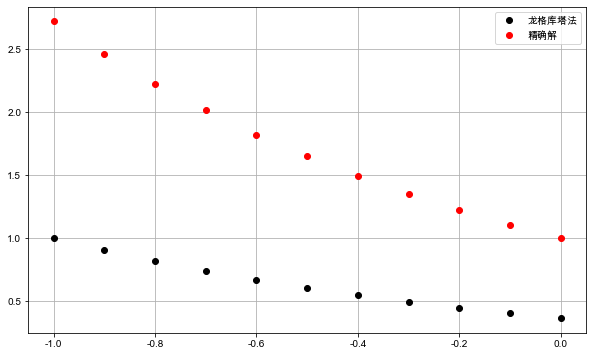

In [54]:
x,y = LGKTF(-1, 0, 0.1, f2, 1)
correct = np.array([np.exp(-i) for i in x])
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(x, y, 'ok',label="龙格库塔法")
plt.plot(x, correct, 'or',label="精确解")
plt.legend()
x,correct